In [62]:
import pandas as pd

dados = pd.read_csv('Bicicletas.csv')
dados.head()

,clima,temperatura,bicicletas_alugadas
0,2,0.363625,985
1,2,0.353739,801
2,1,0.189405,1349
3,1,0.212122,1562
4,1,0.229270,1600


In [63]:
dados.shape

(731, 3)

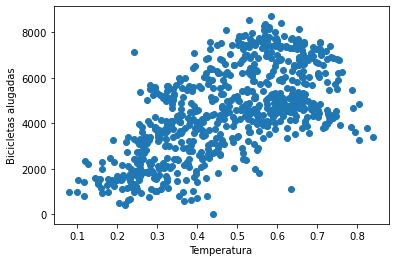

In [64]:
import matplotlib.pyplot as plt

plt.scatter(dados['temperatura'], dados['bicicletas_alugadas'])
plt.ylabel('Bicicletas alugadas')
plt.xlabel('Temperatura')
plt.show()

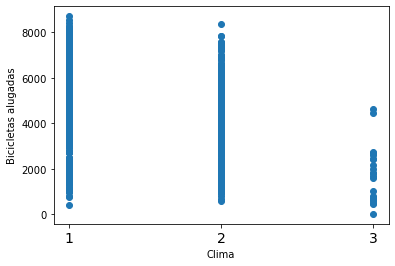

In [65]:
plt.scatter(dados['clima'], dados['bicicletas_alugadas'])
plt.ylabel('Bicicletas alugadas')
plt.xlabel('Clima')
indice = [1, 2, 3]
plt.xticks(indice, fontsize=14)
plt.show()

In [66]:
import numpy as np

y = dados['bicicletas_alugadas'].values
X = dados[['clima', 'temperatura']].values

In [67]:
X = X/np.amax(X, axis=0)
X

array([[0.66666667, 0.43242565],
       [0.66666667, 0.42066914],
       [0.33333333, 0.22524188],
       ...,
       [0.66666667, 0.28826395],
       [0.33333333, 0.27553942],
       [0.66666667, 0.26577246]])

In [68]:
ymax = np.amax(y)
y = y/ymax

## 02: A estrutura da rede neural

![](https://i.imgur.com/3i3TPsH.png)

![](https://i.imgur.com/phyy6qL.png)

In [69]:
def sigmoid(soma):
    return 1 / (1+np.exp(-soma))


def relu(soma):
    return np.maximum(0, soma) 

In [85]:
arquitetura = [
    {"dim_entrada": 2, "dim_saida": 50, "ativacao": 'relu'},
    {"dim_entrada": 50, "dim_saida": 1, "ativacao": 'sigmoid'}
]

valores_parametros = {}
for indice, camada in enumerate(arquitetura):
    indice_camada = indice + 1
    valores_parametros['b' + str(indice_camada)] = np.random.randn(
            camada["dim_saida"], 1) * 0.1

valores_parametros

{'b1': array([[ 0.00856008],
        [ 0.03479056],
        [ 0.17396411],
        [ 0.02088347],
        [ 0.00141391],
        [-0.0633871 ],
        [-0.1051391 ],
        [-0.11453185],
        [ 0.08660776],
        [-0.08546577],
        [ 0.16360299],
        [ 0.06502314],
        [ 0.12973045],
        [-0.01601645],
        [ 0.15204913],
        [-0.03320986],
        [ 0.00123845],
        [-0.14420292],
        [-0.1366438 ],
        [-0.06258935],
        [ 0.04380244],
        [ 0.03814662],
        [ 0.07716938],
        [ 0.02723604],
        [-0.16193842],
        [-0.05300772],
        [-0.0440048 ],
        [ 0.04720703],
        [ 0.08183574],
        [-0.07289379],
        [-0.14828508],
        [ 0.04610558],
        [ 0.13766384],
        [ 0.13899802],
        [-0.0335063 ],
        [-0.01887966],
        [-0.06081608],
        [ 0.12499069],
        [-0.01523074],
        [ 0.07066467],
        [ 0.00371121],
        [ 0.09245377],
        [ 0.16723606],
     

![](https://i.imgur.com/HbyxIUy.png)

In [71]:
def inicia_camadas(arquitetura, seed = 99):
    # inicia os valores aleatórios
    np.random.seed(seed)
    # numero de camadas da rede neural
    numero_de_camadas = len(arquitetura)
    # inicia armazenamento de parametros
    valores_parametros = {}
    
    # itera nas camadas da rede
    for indice, camada in enumerate(arquitetura):
        
        indice_camada = indice + 1
        
        # extrai o numero de nodos nas camadas
        tamanho_camada_entrada = camada["dim_entrada"]
        tamanho_camada_saida = camada["dim_saida"]
        
        # inicia os valores na matriz de pesos P
        # e o vetor de viés ou bias b
        valores_parametros['P' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, tamanho_camada_entrada)  * 0.1
        valores_parametros['b' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, 1) * 0.1
        
    return valores_parametros

![](https://i.imgur.com/RqebpGF.png)

In [72]:
def propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, ativacao="relu"):
    # cálculo da entrada para a função de ativação
    Saida_atual = np.dot(Pesos_atual, Ativado_anterior) + b_atual
    
    # selecção da função de ativação
    if ativacao == "relu":
        func_ativacao = relu
    elif ativacao == "sigmoid":
        func_ativacao = sigmoid
    else:
        raise Exception('Ainda não implementamos essa funcao')
        
    # retorna a ativação calculada Ativado_atual e a matriz intermediária Saida
    return func_ativacao(Saida_atual), Saida_atual

In [73]:
def propaga_total(X, valores_parametros, arquitetura):
    # memoria temporaria para a retropropagacao
    memoria = {}
    # O vetor X é a ativação para a camada 0 
    Ativado_atual = X
    
    # iterações para as camadas
    for indice, camada in enumerate(arquitetura):
        # a numeração das camadas começa de 1
        indice_camada = indice + 1
        # utiliza a ativação da iteração anterior
        Ativado_anterior = Ativado_atual
        
        # extrai a função de ativação para a camada atual
        func_ativacao_atual = camada["ativacao"]
        # extrai os pesos da camada atual
        Pesos_atual = valores_parametros["P" + str(indice_camada)]
        # extrai o bias para a camada atual
        b_atual = valores_parametros["b" + str(indice_camada)]
        # cálculo da ativação para a camada atual
        Ativado_atual, Saida_atual = propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, func_ativacao_atual)
        
        # salca os valores calculados na memória
        memoria["A" + str(indice)] = Ativado_anterior
        memoria["Z" + str(indice_camada)] = Saida_atual
       
    # retorna o vetor predito e um dicionário contendo os valores intermediários
    return Ativado_atual, memoria

## 03: Análise e atualização da rede

In [74]:
valores_parametros = inicia_camadas(arquitetura, seed = 99)
y_estimado, memoria = propaga_total(np.transpose(X), valores_parametros, arquitetura)

In [75]:
y_estimado, memoria = propaga_total(np.transpose(X), valores_parametros, arquitetura)

In [76]:
y_estimado[0, 0] * ymax

4579.982967258466

In [32]:
y[0] * ymax

985.0000000000001

![](https://i.imgur.com/OMzpsEQ.png)

In [17]:
def valor_de_custo(Y_predito, Y):
    # numero_de_exemplos
    m = Y_predito.shape[1]
    
    custo = -1 / m * (np.dot(Y, np.log(Y_predito).T) + np.dot(1 - Y, np.log(1 - Y_predito).T))
    return np.squeeze(custo)
    

![](https://i.imgur.com/8PGpXGx.png)

In [18]:
def atualiza(valores_parametros, gradidentes, arquitetura, taxa_aprendizagem):

    # iterações pelas camadas
    for indice_camada, camada in enumerate(arquitetura, 1):
        valores_parametros["P" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["dP" + str(indice_camada)]        
        valores_parametros["b" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["db" + str(indice_camada)]

    return valores_parametros;

## 04: Retropropagação

In [19]:
def retropropagacao_total(Y_predito, Y, memoria, valores_parametros, arquitetura):
   
    gradientes = {}
    
    # numero de exemplos
    #m = Y.shape[1]
    # para garantir que os dois vetores tenham a mesma dimensão
    Y = Y.reshape(Y_predito.shape)
    
    # inicia o algoritmo de gradiente descendente
    dAtivado_anterior = - (np.divide(Y, Y_predito) - np.divide(1 - Y, 1 - Y_predito));
    
    for indice_camada_anterior, camada in reversed(list(enumerate(arquitetura))):
        
        indice_camada_atual = indice_camada_anterior + 1
        # Função de ativação para a camada atual
        
        funcao_ativao_atual = camada["ativacao"]
        
        dAtivado_atual = dAtivado_anterior
        
        Ativado_anterior = memoria["A" + str(indice_camada_anterior)]
        Saida_atual = memoria["Z" + str(indice_camada_atual)]
        
        Pesos_atual = valores_parametros["P" + str(indice_camada_atual)]
        b_atual = valores_parametros["b" + str(indice_camada_atual)]
        
        dAtivado_anterior, dPesos_atual, db_atual = retropropagacao_uma_camada(
            dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, funcao_ativao_atual)
        
        gradientes["dP" + str(indice_camada_atual)] = dPesos_atual
        gradientes["db" + str(indice_camada_atual)] = db_atual
    
    return gradientes
        

![](https://i.imgur.com/kWhpsQM.png)

In [20]:
def sigmoid_retro(dAtivado, Saida):
    sig = sigmoid(Saida)
    return dAtivado * sig * (1 - sig)

def relu_retro(dAtivado, Saida):
    dSaida = np.array(dAtivado, copy = True)
    dSaida[Saida <= 0] = 0;
    return dSaida;

In [21]:
def retropropagacao_uma_camada(dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, ativacao="relu"):
    # número de exemplos
    m = Ativado_anterior.shape[1]
    
    # seleção função de ativação
    if ativacao == "relu":
        func_ativacao_retro = relu_retro
    elif ativacao == "sigmoid":
        func_ativacao_retro = sigmoid_retro
    else:
        raise Exception('Ainda não implementamos essa funcao')
    
    # derivada da função de ativação
    dSaida_atual = func_ativacao_retro(dAtivado_atual, Saida_atual)
    
    # derivada da matriz de Pesos
    dPesos_atual = np.dot(dSaida_atual, Ativado_anterior.T) / m
    # derivada do vetor b
    db_atual = np.sum(dSaida_atual, axis=1, keepdims=True) / m
    # derivada da matriz A_anterior
    dAtivado_anterior = np.dot(Pesos_atual.T, dSaida_atual)

    return dAtivado_anterior, dPesos_atual, db_atual

## 05: Treinamento

In [22]:
def treino(X, Y,X_teste,Y_teste, arquitetura, epocas, taxa_aprendizagem):
    # Inicia os parâmetros da rede neural
    valores_parametros = inicia_camadas(arquitetura, 2)
    # Listas que vão guardar o progresso da aprendizagem da rede 
    historia_custo = []
    historia_custo_teste = []
   
    
    # Atualiza a cada época
    for i in range(epocas):
        # Propaga a rede - Foward propagation
        Y_predito, memoria = propaga_total(X, valores_parametros, arquitetura)
        
        Y_predito_teste, memoria2 = propaga_total(X_teste, valores_parametros, 
                                                  arquitetura)
        
        # calcula as métricas e salva nas listas de história
        custo = valor_de_custo(Y_predito, Y)
        historia_custo.append(custo)
        custo_teste = valor_de_custo(Y_predito_teste, Y_teste)
        historia_custo_teste.append(custo_teste)
        
        
        # Retropropagação - Backpropagation
        gradientes = retropropagacao_total(Y_predito, Y, memoria, 
                                           valores_parametros, arquitetura)
        # Atualiza os pesos
        valores_parametros = atualiza(valores_parametros, gradientes, 
                                      arquitetura, taxa_aprendizagem)
        
        if(i % 50 == 0):
            
            print("Iteração: {:05} - custo: {:.5f} ".format(i, custo))
            
            
    return valores_parametros, historia_custo, historia_custo_teste

In [23]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.43, random_state=43)

# Treinamento
valores_parametros, historia_custo, historia_custo_teste = treino(np.transpose(X_treino), np.transpose(y_treino.reshape((y_treino.shape[0], 1))), 
                                                                  np.transpose(X_teste), np.transpose(y_teste.reshape((y_teste.shape[0], 1))), 
                                                                  arquitetura, 20000, 0.01)

Iteração: 00000 - custo: 0.69393 
Iteração: 00050 - custo: 0.69314 
Iteração: 00100 - custo: 0.69245 
Iteração: 00150 - custo: 0.69185 
Iteração: 00200 - custo: 0.69135 
Iteração: 00250 - custo: 0.69089 
Iteração: 00300 - custo: 0.69046 
Iteração: 00350 - custo: 0.69005 
Iteração: 00400 - custo: 0.68964 
Iteração: 00450 - custo: 0.68923 
Iteração: 00500 - custo: 0.68882 
Iteração: 00550 - custo: 0.68842 
Iteração: 00600 - custo: 0.68803 
Iteração: 00650 - custo: 0.68766 
Iteração: 00700 - custo: 0.68731 
Iteração: 00750 - custo: 0.68697 
Iteração: 00800 - custo: 0.68663 
Iteração: 00850 - custo: 0.68629 
Iteração: 00900 - custo: 0.68595 
Iteração: 00950 - custo: 0.68561 
Iteração: 01000 - custo: 0.68526 
Iteração: 01050 - custo: 0.68492 
Iteração: 01100 - custo: 0.68458 
Iteração: 01150 - custo: 0.68423 
Iteração: 01200 - custo: 0.68388 
Iteração: 01250 - custo: 0.68353 
Iteração: 01300 - custo: 0.68317 
Iteração: 01350 - custo: 0.68281 
Iteração: 01400 - custo: 0.68245 
Iteração: 0145

Text(0.5, 0, 'Epocas')

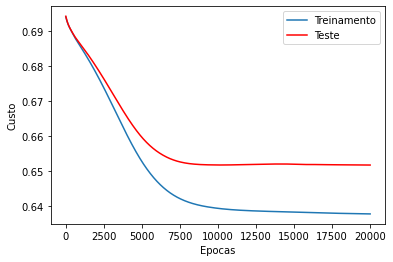

In [24]:
plt.plot(historia_custo)
plt.plot(historia_custo_teste, 'r')
plt.legend(['Treinamento', 'Teste'])
plt.ylabel('Custo')
plt.xlabel('Epocas')

In [25]:
Y_pred, _ = propaga_total(np.transpose(X_teste), valores_parametros, arquitetura)


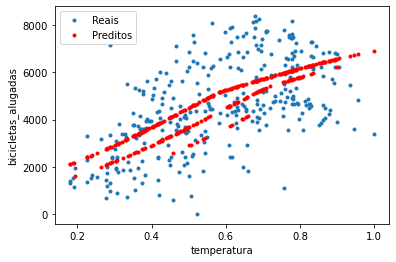

In [26]:
plt.plot(np.transpose(X_teste)[1],ymax*y_teste,'.')
plt.plot(np.transpose(X_teste)[1],ymax*Y_pred.reshape([-1,1]),'.r')
plt.legend(['Reais','Preditos'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('temperatura')
plt.show()

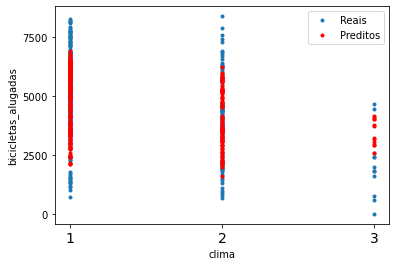

In [27]:
plt.plot(3*np.transpose(X_teste)[0],ymax*y_teste,'.')
plt.plot(3*np.transpose(X_teste)[0],ymax*Y_pred.reshape([-1,1]),'.r')
plt.legend(['Reais','Preditos'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('clima')
plt.rcParams.update({'font.size': 22})
indice=[1,2,3]
plt.xticks(indice, fontsize=14)
plt.show()